EDA for demographics_event_train
1. Merge dataset
2. Age 
3. Marital status

Questions:
- How different age related to motality/readmission
- How to deal with inbalanced dataset
- How to deal with event data (date-time)



In [9]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inpatient_admissions_train = pd.read_csv('/home/bhatti/dataset/VCHAMPS/inpatient_admissions_train.csv').iloc[:,1:]
demographics_event_train = pd.read_csv('/home/bhatti/dataset/VCHAMPS/demographics_event_train.csv').iloc[:,1:]

In [6]:
inpatient_demographics_event = inpatient_admissions_train.merge(demographics_event_train, how = 'left', on = 'Internalpatientid')
inpatient_demographics_event.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Age at update,Event date,Marital status,Ruca category
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah,72.394105,2022-08-29 01:05:08.0,Married,Urban
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina,88.980142,2014-12-20 05:48:29.0,Separated,Urban
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina,88.980142,2014-12-20 05:48:29.0,Separated,Urban
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida,75.305350,2024-08-16 02:31:43.0,Divorced,Urban
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho,83.427331,2000-04-04 16:32:52.0,Married,Rural


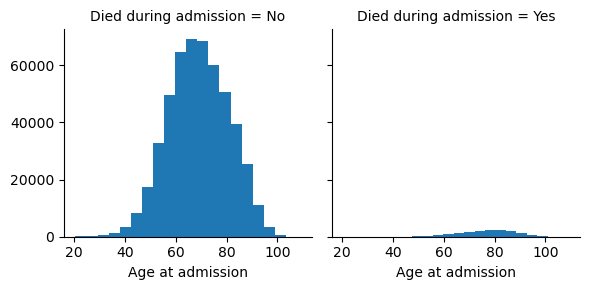

In [7]:
age_mortality = sns.FacetGrid(inpatient_demographics_event, col='Died during admission')
age_mortality.map(plt.hist, 'Age at admission', bins=20)

In [8]:
inpatient_demographics_event['Marital status'].value_counts()

Married                     228820
Divorced                    146894
Widowed                      71298
Never married                51879
Separated                    21802
Not specified (no value)       866
Unknown                        782
Single                         399
Name: Marital status, dtype: int64

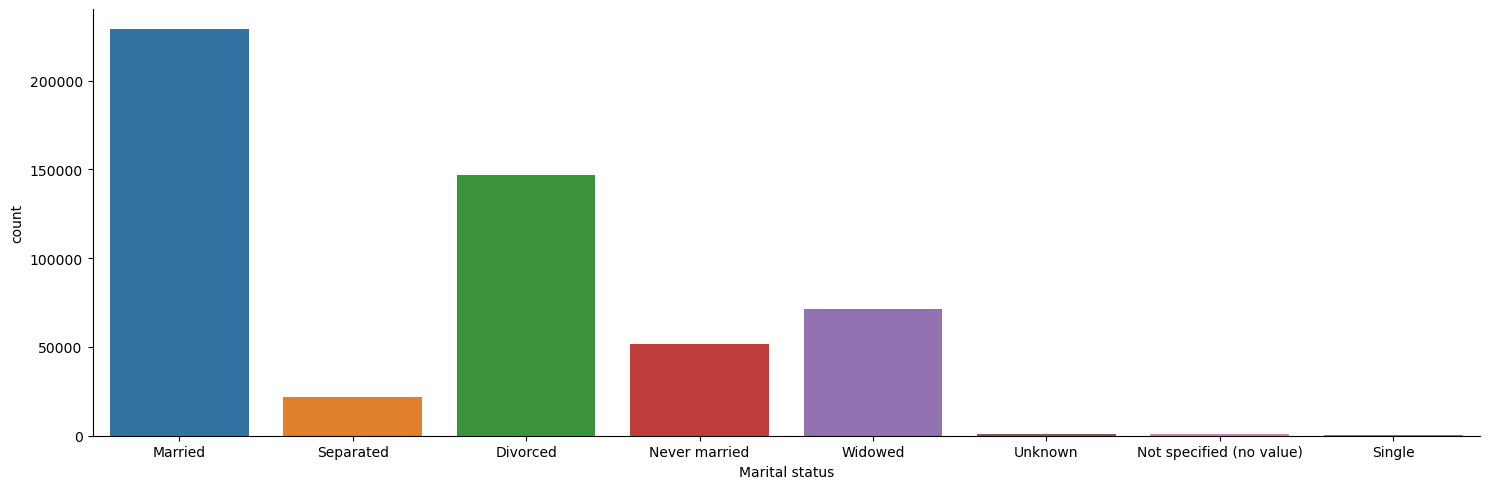

In [22]:
sns.catplot(data=inpatient_demographics_event, x='Marital status', kind="count", aspect=3)

In [10]:
inpatient_demographics_event['Ruca category'].value_counts()

Urban            356784
Rural            158488
Highly rural       5980
Not specified      1488
Name: Ruca category, dtype: int64

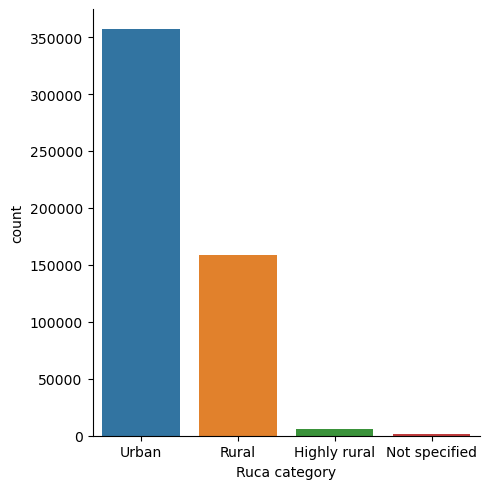

In [24]:
sns.catplot(data=inpatient_demographics_event, x='Ruca category', kind="count", aspect=1)